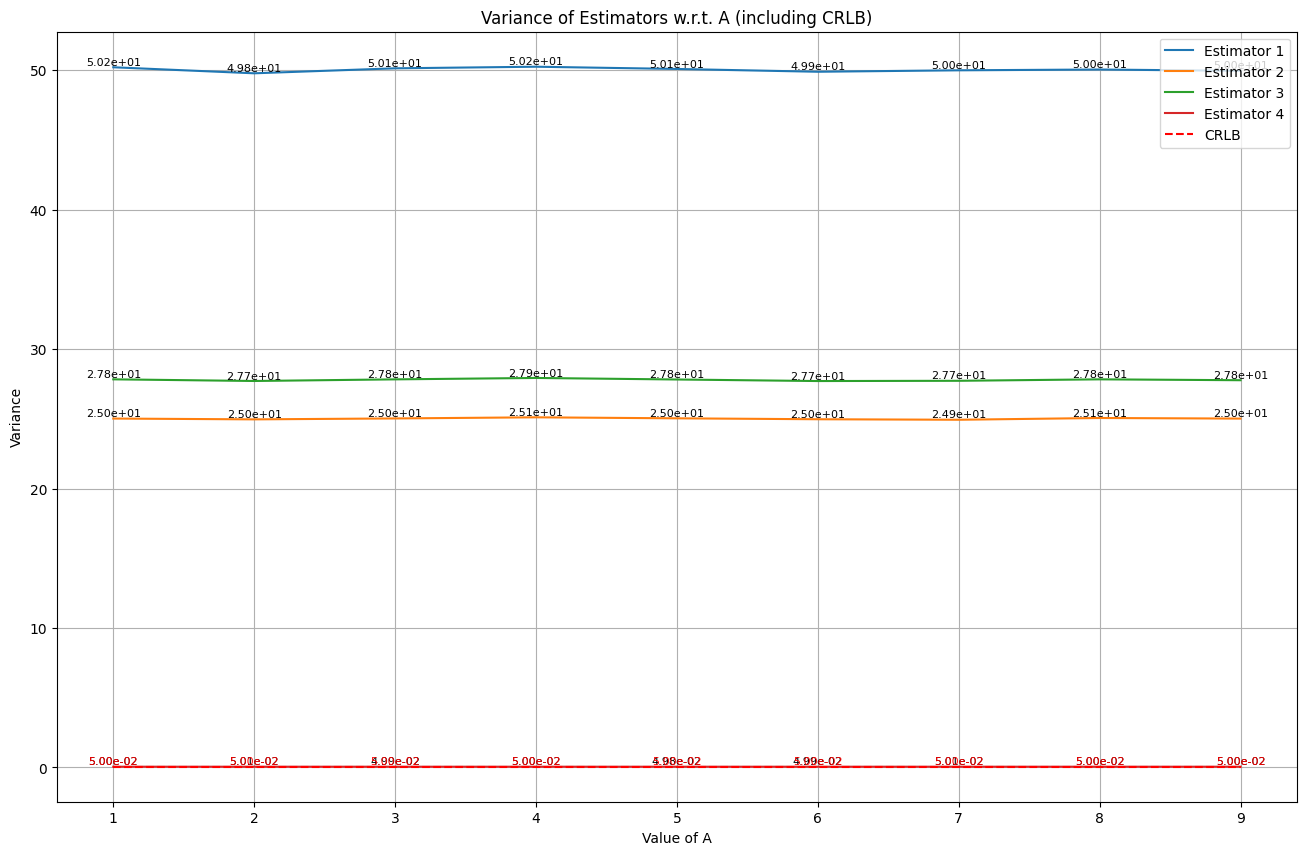

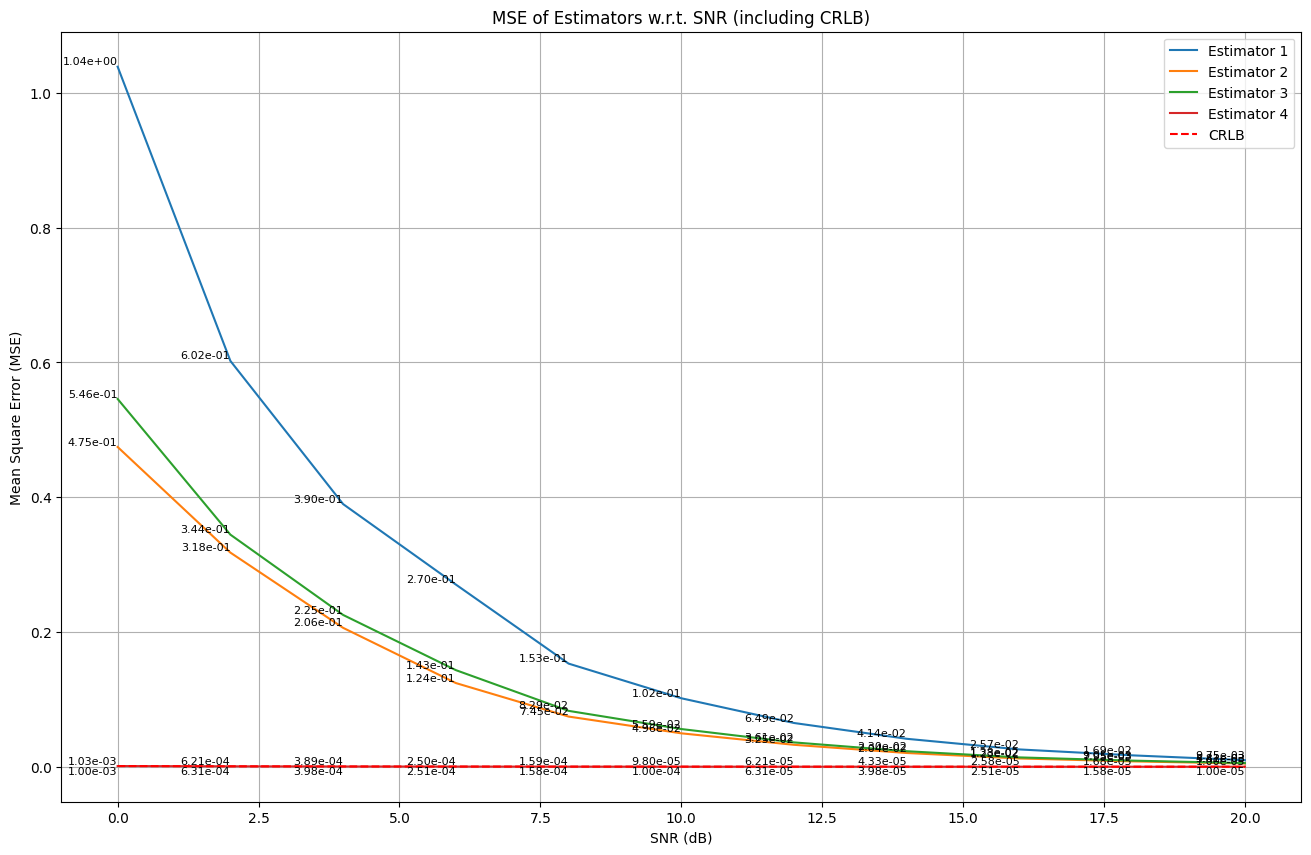

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma2 = 50
N = 1000
itarations = 500000

# Generate the signal x[n]
def generate_signal(A, sigma2, N):
    noise = np.random.normal(0, np.sqrt(sigma2), N)
    return A + noise

# Estimators
def estimator_1(x):
    return x[0]

def estimator_2(x):
    return (x[0] + x[1]) / 2

def estimator_3(x):
    return (2 / 3) * x[0] + (1 / 3) * x[1]

def estimator_4(x):
    return np.mean(x)

# Calculate CRLB
def calculate_crlb(sigma2, N):
    return sigma2 / N

# Monte Carlo simulation
def monte_carlo_simulation(A, sigma2, N, iterations, estimators):
    estimator_variances = np.zeros(len(estimators))
    estimator_mse = np.zeros(len(estimators))
    for _ in range(iterations):
        x = generate_signal(A, sigma2, N)
        estimates = [estimator(x) for estimator in estimators]
        estimator_variances += np.array([(est - A)**2 for est in estimates])
        estimator_mse += np.array([(est - A)**2 for est in estimates])
    estimator_variances /= iterations
    estimator_mse /= iterations
    return estimator_variances, estimator_mse

# Experiment 1: Variance w.r.t. A (1 to 10)
def experiment_variance_vs_A():
    A_values = np.arange(1, 10, 1)  # A varied from -10 to 10
    estimators = [estimator_1, estimator_2, estimator_3, estimator_4]
    variances_all = []
    crlb_values = []
    for A in A_values:
        variances, _ = monte_carlo_simulation(A, sigma2, N, itarations, estimators)
        variances_all.append(variances)
        crlb_values.append(calculate_crlb(sigma2, N))
    
    variances_all = np.array(variances_all)
    crlb_values = np.array(crlb_values)
    
    # Plotting Variance w.r.t. A
    plt.figure(figsize=(16, 10))
    for i in range(variances_all.shape[1]):
        plt.plot(A_values, variances_all[:, i], label=f'Estimator {i + 1}')
        for j, value in enumerate(variances_all[:, i]):
            plt.text(A_values[j], value, f'{value:.2e}', fontsize=8, ha='center', va='bottom')

    plt.plot(A_values, crlb_values, 'r--', label='CRLB')
    for j, value in enumerate(crlb_values):
        plt.text(A_values[j], value, f'{value:.2e}', fontsize=8, ha='center', va='bottom', color='red')

    plt.xlabel('Value of A')
    plt.ylabel('Variance')
    plt.title('Variance of Estimators w.r.t. A (including CRLB)')
    plt.legend()
    plt.grid()
    plt.show()

# Experiment 2: MSE w.r.t. SNR
def experiment_mse_vs_snr():
    SNR_dB = np.arange(0, 21, 2)  # SNR in dB from 0 to 20
    A = 1  # Fix A to 1
    estimators = [estimator_1, estimator_2, estimator_3, estimator_4]
    mse_all = []
    crlb_values = []
    
    for snr in SNR_dB:
        sigma2_current = A**2 / (10**(snr / 10))  # Calculate noise variance based on SNR
        _, mse = monte_carlo_simulation(A, sigma2_current, N, 1000, estimators)
        mse_all.append(mse)
        crlb_values.append(calculate_crlb(sigma2_current, N))
    
    mse_all = np.array(mse_all)
    crlb_values = np.array(crlb_values)
    
    # Plotting MSE w.r.t. SNR
    plt.figure(figsize=(16, 10))
    for i in range(mse_all.shape[1]):
        plt.plot(SNR_dB, mse_all[:, i], label=f'Estimator {i + 1}')
        # Annotating the values
        for x, y in zip(SNR_dB, mse_all[:, i]):
            plt.text(x, y, f'{y:.2e}', fontsize=8, ha='right', va='bottom')

    # Plot CRLB
    plt.plot(SNR_dB, crlb_values, 'r--', label='CRLB')
    for x, y in zip(SNR_dB, crlb_values):
        plt.text(x, y, f'{y:.2e}', fontsize=8, ha='right', va='top')

    plt.xlabel('SNR (dB)')
    plt.ylabel('Mean Square Error (MSE)')
    plt.title('MSE of Estimators w.r.t. SNR (including CRLB)')
    plt.legend()
    plt.grid()
    plt.show()

# Run the experiments
experiment_variance_vs_A()
experiment_mse_vs_snr()
